In [1]:
#pandas and numpy package
import pandas as pd
import numpy as np

In [2]:
#reading match_analysis
df_match=pd.read_csv('C:/Users/Mayank Gupta/Desktop/IPL_analysis/Datasets/match_data.csv') 

In [3]:
#All the matches RCB played
df_kkr=df_match[df_match.team1_id=='KKR'] 
df_kkr_2=df_match[df_match.team2_id=='KKR']
df_kkr_matches=pd.concat([df_kkr,df_kkr_2]) #All the matches RCB played 

In [5]:
#to find the season wise wins of kkr
import sys
wins=[]
season=[]
for i in range(2008,2018):
    seasonwisewins=df_kkr_matches[df_kkr_matches.season==i]
    season.append(i)
    wins.append(len(seasonwisewins[df_kkr_matches.winner=='KKR']))

C:\Users\Mayank Gupta\AppData\Local\Continuum\Anaconds\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [6]:
dictionary_kkr_wins = dict(zip(season, wins)) #dictionary containing season and number wins

In [7]:
dictionary_kkr_wins

{2008: 6,
 2009: 3,
 2010: 7,
 2011: 8,
 2012: 12,
 2013: 6,
 2014: 11,
 2015: 7,
 2016: 8,
 2017: 9}

In [8]:
season=list(map(str,season)) #convert list of int to list of strings

<b>KKR had best seasons in year 2012,2014,2019 </b>

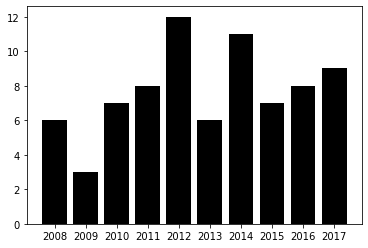

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

names = list(dictionary_kkr_wins.keys())
values = list(dictionary_kkr_wins.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(dictionary_kkr_wins)),values,tick_label=names,color='black')
plt.show()

In [11]:
# Standard plotly imports
import chart_studio 
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode,plot
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)


In [14]:
data = [go.Bar(
            x=names,
            y=values,
            marker=dict(color='#000000'), 
            name="Wins",
            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Year', titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        )),title='Season Wise Wins',   
         yaxis=dict(
        title='Number Of Wins',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='style-bar')

<b>Let us see KKR performance in and away from home Did it had a huge impact on their success Let us Find Out..</b>

In [16]:
wins=df_kkr_matches[df_kkr_matches.winner=='KKR']  
wins_At_home=wins[wins.city=='Kolkata']
count_home=len(wins_At_home)
wins_away=wins[wins.city!='Kolkata']
count_away=len(wins_away)
labels = ['Home Wins','Away Wins']
values = [count_home,count_away]
trace = go.Pie(labels=labels, values=values)
iplot([trace], filename='basic_pie_chart',show_link=False)

<b>Of all the matches KKR won there 52% wins were from away games <br>Now Let us see toss dependency on KKR success</b>

In [17]:
toss_wins_match=wins[wins.toss_winner=='KKR']
len(toss_wins_match)


44

In [18]:
loss_wins_match=wins[wins.toss_winner!='KKR']
len(loss_wins_match)

33

<b>Toss matter for KKR . They have won 44 matches when the won the toss and 33 while losing the toss</b>

In [19]:
matches_won_batting_first=wins[wins.win_by_runs>0]
batting_first=len(matches_won_batting_first)
matches_won_chasing=wins[wins.win_by_wickets>0]
batting_second=len(matches_won_chasing)

In [20]:
print(batting_first)
print(batting_second)

31
46


<b>So RCB has won 31 matches batting first and 46 matches while chasing. Let us see what happened in last 4 seasons</b>

In [21]:
wins_season_2014=wins[wins.season==2014]
wins_season_2015=wins[wins.season==2015]
wins_season_2016=wins[wins.season==2016]
wins_season_2017=wins[wins.season==2017]
wins_last_4_seasons=pd.concat([wins_season_2014,wins_season_2015,wins_season_2016,wins_season_2017])

In [22]:
matches_won_batting_first=wins_last_4_seasons[wins_last_4_seasons.win_by_runs>0]
batting_first=len(matches_won_batting_first)
matches_won_chasing=wins_last_4_seasons[wins_last_4_seasons.win_by_wickets>0]
batting_second=len(matches_won_chasing)

In [23]:
print(batting_first)
print(batting_second)

10
25


<b>In last four seasons KKR has won 25 matches while chasing and 10 while batting first. So KKR are comfortable in chasing</b>

In [24]:
man_of_the_match=wins_last_4_seasons['player_of_match'].value_counts()

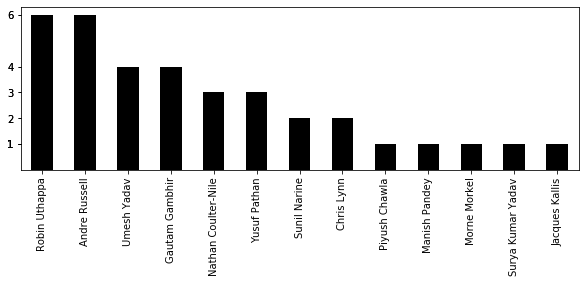

In [26]:
man_of_the_match.plot.bar(figsize=(10,3),xticks=man_of_the_match,yticks=man_of_the_match,color='black')
plt.show()

In [27]:
man_of_the_match_overall=wins['player_of_match'].value_counts()

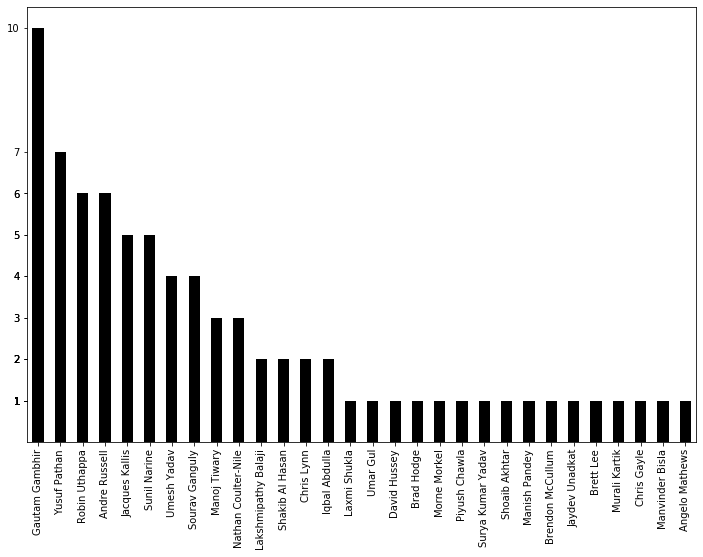

In [29]:
man_of_the_match_overall.plot.bar(figsize=(12,8),xticks=man_of_the_match_overall,yticks=man_of_the_match_overall,color='black')
plt.show()

<b>KKR has lot of match winners but they have not retained their match winners except russel and uthappa</b>

In [30]:
wins['team1_id'].unique()

array(['KKR', 'DC', 'KXI', 'CSK', 'RR', 'RCB', 'MI', 'PW', 'DD', 'SRH',
       'RPS', 'GL'], dtype=object)

In [41]:
csk_loss=len(wins[(wins.team1_id =='CSK') | (wins.team2_id=='CSK')]) 
mi_loss=len(wins[(wins.team1_id =='MI') | (wins.team2_id=='MI')]) 
kxi_loss=len(wins[(wins.team1_id =='KXI') | (wins.team2_id=='KXI')])
dd_loss=len(wins[(wins.team1_id =='DD') | (wins.team2_id=='DD')])
rr_loss=len(wins[(wins.team1_id =='RR') | (wins.team2_id=='RR')])
dc_loss=len(wins[(wins.team1_id =='DC') | (wins.team2_id=='DC')])
rcb_loss=len(wins[(wins.team1_id =='RCB') | (wins.team2_id=='RCB')])
srh_loss=len(wins[(wins.team1_id =='SRH') | (wins.team2_id=='SRH')])
teams_loss=[csk_loss,mi_loss,kxi_loss,dd_loss,rr_loss,dc_loss,rcb_loss,srh_loss]
labelss=['CSK','MI','KXI','DD','RR','DC','RCB','SRH']

In [42]:
data = [go.Bar(
            x=labelss,
            y=teams_loss,
            marker=dict(color=['#F9F606','#0983FC','#FB5304','#4404FB','#FB04D9','#0939FA','#FF0000','#FA9B09']), 
            name="Wins",            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Teams', titlefont=dict(
            size=16,
        
        )),title='KKR vs Different teams',   
         yaxis=dict(
        title='Number Of Wins',
        titlefont=dict(
            size=16
        ),
        tickfont=dict(
            size=14
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='style-bar',show_link=False)

<b>It would be better if instead of number of wins we used win percentage</b>

In [46]:
csk_matches=len(df_kkr_matches[(df_kkr_matches.team1_id =='CSK') | (df_kkr_matches.team2_id=='CSK')]) 
mi_matches=len(df_kkr_matches[(df_kkr_matches.team1_id =='MI') | (df_kkr_matches.team2_id=='MI')]) 
kxi_matches=len(df_kkr_matches[(df_kkr_matches.team1_id =='KXI') | (df_kkr_matches.team2_id=='KXI')])
dd_matches=len(df_kkr_matches[(df_kkr_matches.team1_id =='DD') | (df_kkr_matches.team2_id=='DD')])
rr_matches=len(df_kkr_matches[(df_kkr_matches.team1_id =='RR') | (df_kkr_matches.team2_id=='RR')])
dc_matches=len(df_kkr_matches[(df_kkr_matches.team1_id =='DC') | (df_kkr_matches.team2_id=='DC')])
rcb_matches=len(df_kkr_matches[(df_kkr_matches.team1_id =='RCB') | (df_kkr_matches.team2_id=='RCB')])
srh_matches=len(df_kkr_matches[(df_kkr_matches.team1_id =='SRH') | (df_kkr_matches.team2_id=='SRH')])
teams_matches=[csk_matches,mi_matches,kxi_matches,dd_matches,rr_matches,dc_matches,rcb_matches,srh_matches]
labelss=['CSK','MI','KXI','DD','RR','DC','RCB','SRH']

In [47]:
res_list = [teams_loss[i]/teams_matches[i]*100 for i in range(len(teams_matches))]

In [48]:
data = [go.Bar(
            x=labelss,
            y=res_list,
            marker=dict(color=['#F9F606','#0983FC','#FB5304','#4404FB','#FB04D9','#0939FA','#FF0000','#FA9B09']), 
            name="Wins",            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Teams', titlefont=dict(
            size=16,
        
        )),title='KKR vs Different teams',   
         yaxis=dict(
        title='Win percentage',
        titlefont=dict(
            size=16
        ),
        tickfont=dict(
            size=14
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='style-bar',show_link=False)

<b>This gives a better insight of KKR performance against different teams we can see KKR has won 77 % games against DC and have lowest success rate against MI</b>